<a href="https://colab.research.google.com/github/maryamgaber/Detection-of-AI-Generated-Arabic-Text/blob/main/Phase_1%262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1.2: Use the datasets library from Hugging Face to download the arabic- generated-abstracts dataset directly into a Python environment (By Google Colab).

In [ ]:
# !pip install datasets
# !pip install python-dotenv


In [ ]:
from dotenv import load_dotenv
import os
from huggingface_hub import login

load_dotenv()

hf_token = os.getenv("HF_TOKEN")
login(token=hf_token)

In [ ]:
from datasets import load_dataset

# Login using e.g. `huggingface-cli login` to access this dataset
dataset = load_dataset("KFUPM-JRCAI/arabic-generated-abstracts")
print(dataset)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/by_polishing-00000-of-00001.parquet:   0%|          | 0.00/8.49M [00:00<?, ?B/s]

data/from_title-00000-of-00001.parquet:   0%|          | 0.00/6.90M [00:00<?, ?B/s]

data/from_title_and_content-00000-of-000(…):   0%|          | 0.00/7.01M [00:00<?, ?B/s]

Generating by_polishing split:   0%|          | 0/2851 [00:00<?, ? examples/s]

Generating from_title split:   0%|          | 0/2963 [00:00<?, ? examples/s]

Generating from_title_and_content split:   0%|          | 0/2574 [00:00<?, ? examples/s]

DatasetDict({
    by_polishing: Dataset({
        features: ['original_abstract', 'allam_generated_abstract', 'jais_generated_abstract', 'llama_generated_abstract', 'openai_generated_abstract'],
        num_rows: 2851
    })
    from_title: Dataset({
        features: ['original_abstract', 'allam_generated_abstract', 'jais_generated_abstract', 'llama_generated_abstract', 'openai_generated_abstract'],
        num_rows: 2963
    })
    from_title_and_content: Dataset({
        features: ['original_abstract', 'allam_generated_abstract', 'jais_generated_abstract', 'llama_generated_abstract', 'openai_generated_abstract'],
        num_rows: 2574
    })
})


### Task 1.3: Perform initial data exploration:
#### 1- Load and inspect the dataset structure (columns, data types).


In [ ]:
# Inspect column names and data types for one split (e.g., 'by_polishing')
print("\nFeatures in 'by_polishing':")
print(dataset['by_polishing'].features)

# Check dataset info (shape, structure, statistics)
print("\nDataset info for 'by_polishing':")
print(dataset['by_polishing'])





Features in 'by_polishing':
{'original_abstract': Value('string'), 'allam_generated_abstract': Value('string'), 'jais_generated_abstract': Value('string'), 'llama_generated_abstract': Value('string'), 'openai_generated_abstract': Value('string')}

Dataset info for 'by_polishing':
Dataset({
    features: ['original_abstract', 'allam_generated_abstract', 'jais_generated_abstract', 'llama_generated_abstract', 'openai_generated_abstract'],
    num_rows: 2851
})


#### 2- Check the distribution of the target variable (label: human vs. AI- generated) for dataset["by_polishing"].


In [ ]:
# Choose one split (e.g., by_polishing)
split1 = dataset["by_polishing"]

# Count human-written abstracts
num_human = len(split1["original_abstract"])

# Count AI-generated abstracts (4 per row)
num_ai = len(split1["allam_generated_abstract"]) \
       + len(split1["jais_generated_abstract"]) \
       + len(split1["llama_generated_abstract"]) \
       + len(split1["openai_generated_abstract"])

print("Number of human abstracts:", num_human)
print("Number of AI-generated abstracts:", num_ai)

# Distribution ratio
total = num_human + num_ai
print("Human %:", round(num_human / total * 100, 2))
print("AI %:", round(num_ai / total * 100, 2))

Number of human abstracts: 2851
Number of AI-generated abstracts: 11404
Human %: 20.0
AI %: 80.0


#### 3- Assess data quality: check for missing values, duplicates, and inconsistencies:


Missing values → any None/NaN in columns

Duplicates → same abstract appearing multiple times

Inconsistencies → like empty strings " " or unusual data

In [ ]:
import pandas as pd
# Convert to pandas for easier checks
df = pd.DataFrame(split1)

# 1. Missing values
print("Missing values per column:")
print(df.isnull().sum())
print("_________________________________________")

# 2. Duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Also check duplicates in each column separately
for col in df.columns:
    print(f"Duplicates in column {col}: {df[col].duplicated().sum()}")
print("_________________________________________")


# 3. Inconsistencies: empty strings or only spaces
for col in df.columns:
    empty_count = df[col].apply(lambda x: str(x).strip() == "").sum()
    print(f"Empty/blank values in column {col}: {empty_count}")


Missing values per column:
original_abstract            0
allam_generated_abstract     0
jais_generated_abstract      0
llama_generated_abstract     0
openai_generated_abstract    0
dtype: int64
_________________________________________

Number of duplicate rows: 0
Duplicates in column original_abstract: 0
Duplicates in column allam_generated_abstract: 0
Duplicates in column jais_generated_abstract: 0
Duplicates in column llama_generated_abstract: 0
Duplicates in column openai_generated_abstract: 0
_________________________________________
Empty/blank values in column original_abstract: 0
Empty/blank values in column allam_generated_abstract: 0
Empty/blank values in column jais_generated_abstract: 0
Empty/blank values in column llama_generated_abstract: 0
Empty/blank values in column openai_generated_abstract: 0


####Check the distribution of the target variable (label: human vs. AI- generated) for dataset["from_title"].

In [ ]:
split2 = dataset["from_title"]

# Count human-written abstracts
num_human = len(split2["original_abstract"])

# Count AI-generated abstracts (4 per row)
num_ai = len(split2["allam_generated_abstract"]) \
       + len(split2["jais_generated_abstract"]) \
       + len(split2["llama_generated_abstract"]) \
       + len(split2["openai_generated_abstract"])

print("Number of human abstracts:", num_human)
print("Number of AI-generated abstracts:", num_ai)

# Distribution ratio
total = num_human + num_ai
print("Human %:", round(num_human / total * 100, 2))
print("AI %:", round(num_ai / total * 100, 2))

Number of human abstracts: 2963
Number of AI-generated abstracts: 11852
Human %: 20.0
AI %: 80.0


In [ ]:
import pandas as pd
# Convert to pandas for easier checks
df = pd.DataFrame(split2)

# 1. Missing values
print("Missing values per column:")
print(df.isnull().sum())
print("_________________________________________")

# 2. Duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Also check duplicates in each column separately
for col in df.columns:
    print(f"Duplicates in column {col}: {df[col].duplicated().sum()}")
print("_________________________________________")


# 3. Inconsistencies: empty strings or only spaces
for col in df.columns:
    empty_count = df[col].apply(lambda x: str(x).strip() == "").sum()
    print(f"Empty/blank values in column {col}: {empty_count}")


Missing values per column:
original_abstract            0
allam_generated_abstract     0
jais_generated_abstract      0
llama_generated_abstract     0
openai_generated_abstract    0
dtype: int64
_________________________________________

Number of duplicate rows: 0
Duplicates in column original_abstract: 0
Duplicates in column allam_generated_abstract: 0
Duplicates in column jais_generated_abstract: 0
Duplicates in column llama_generated_abstract: 0
Duplicates in column openai_generated_abstract: 0
_________________________________________
Empty/blank values in column original_abstract: 0
Empty/blank values in column allam_generated_abstract: 0
Empty/blank values in column jais_generated_abstract: 0
Empty/blank values in column llama_generated_abstract: 0
Empty/blank values in column openai_generated_abstract: 0


####Check the distribution of the target variable (label: human vs. AI- generated) for dataset["from_title_and_content"].

In [ ]:
split3 = dataset["from_title_and_content"]

# Count human-written abstracts
num_human = len(split3["original_abstract"])

# Count AI-generated abstracts (4 per row)
num_ai = len(split3["allam_generated_abstract"]) \
       + len(split3["jais_generated_abstract"]) \
       + len(split3["llama_generated_abstract"]) \
       + len(split3["openai_generated_abstract"])

print("Number of human abstracts:", num_human)
print("Number of AI-generated abstracts:", num_ai)

# Distribution ratio
total = num_human + num_ai
print("Human %:", round(num_human / total * 100, 2))
print("AI %:", round(num_ai / total * 100, 2))

Number of human abstracts: 2574
Number of AI-generated abstracts: 10296
Human %: 20.0
AI %: 80.0


In [ ]:
import pandas as pd
# Convert to pandas for easier checks
df = pd.DataFrame(split3)

# 1. Missing values
print("Missing values per column:")
print(df.isnull().sum())
print("_________________________________________")

# 2. Duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Also check duplicates in each column separately
for col in df.columns:
    print(f"Duplicates in column {col}: {df[col].duplicated().sum()}")
print("_________________________________________")


# 3. Inconsistencies: empty strings or only spaces
for col in df.columns:
    empty_count = df[col].apply(lambda x: str(x).strip() == "").sum()
    print(f"Empty/blank values in column {col}: {empty_count}")


Missing values per column:
original_abstract            0
allam_generated_abstract     0
jais_generated_abstract      0
llama_generated_abstract     0
openai_generated_abstract    0
dtype: int64
_________________________________________

Number of duplicate rows: 0
Duplicates in column original_abstract: 0
Duplicates in column allam_generated_abstract: 0
Duplicates in column jais_generated_abstract: 3
Duplicates in column llama_generated_abstract: 0
Duplicates in column openai_generated_abstract: 0
_________________________________________
Empty/blank values in column original_abstract: 0
Empty/blank values in column allam_generated_abstract: 0
Empty/blank values in column jais_generated_abstract: 0
Empty/blank values in column llama_generated_abstract: 0
Empty/blank values in column openai_generated_abstract: 0


## Phase 2 -preprocessing

In [ ]:
# task 2.1: Arabic Text Preprocessing

import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer
from datasets import load_dataset


In [ ]:
# Download required NLTK resources
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Check columns
print(df.head())

                                   original_abstract  \
0  كثيرا ما ارتبطت المصادر التاريخية في الأندلس خ...   
1  يعد العامل الثقافي احد ابرز الاسباب التي يعزى ...   
2  شكلت تلك الجهود والمساعي الرائدة التي قام بها ...   
3  يقوم المقال على اشكالية الضرائب الغير شرعية في...   
4  تعددت صور الحياة الثقافية و الفكرية و الأدبية ...   

                            allam_generated_abstract  \
0  يتناول هذا البحث موضوع نظام التعليم عند المرأة...   
1  يتناول هذا البحث دراسة خلفيات انهيار دولة المو...   
2  يتناول هذا البحث موضوع تسليح جيش التحرير الوطن...   
3  يتناول هذا البحث موضوع الضرائب غير الشرعية في ...   
4  يتناول هذا البحث تأثير السلطة العالمة في الإبد...   

                             jais_generated_abstract  \
0  تتناول هذه الدراسة نظام التعليم عند المرأة الأ...   
1  يعد العامل الثقافي أحد أبرز الأسباب التي أدت إ...   
2  للأسف، النص المقدم غير واضح وغير قابل للقراءة ...   
3  يناقش المقال مشكلة الضرائب غير الشرعية في مراح...   
4  تتناول هذه الدراسة تأثير السلطة العالمة على

#Define Arabic text cleaning functions

In [ ]:
# Remove tashkeel (diacritics)
def remove_diacritics(text):
    arabic_diacritics = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    return re.sub(arabic_diacritics, '', text)

In [ ]:
# Normalize Arabic text
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "و", text)
    text = re.sub("ئ", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("[^؀-ۿ ]+", " ", text)  # remove non-Arabic chars
    return text

In [ ]:
# Initialize stopwords and stemmer
arabic_stopwords = set(stopwords.words("arabic"))
stemmer = ISRIStemmer()

In [ ]:
# Full preprocessing pipeline
def preprocess_text(text):
    text = str(text)
    text = remove_diacritics(text)
    text = normalize_arabic(text)
    tokens = text.split()
    tokens = [w for w in tokens if w not in arabic_stopwords]
    tokens = [stemmer.stem(w) for w in tokens]
    return " ".join(tokens)

In [ ]:
# Apply preprocessing
text_columns = [
    'original_abstract',
    'allam_generated_abstract',
    'jais_generated_abstract',
    'llama_generated_abstract',
    'openai_generated_abstract'
]
for col in text_columns:
    clean_col = col + "_clean"
    df[clean_col] = df[col].apply(preprocess_text)
print(" Preprocessing complete! Here are the new columns:")
print(df.columns)
df.head(2)

 Preprocessing complete! Here are the new columns:
Index(['original_abstract', 'allam_generated_abstract',
       'jais_generated_abstract', 'llama_generated_abstract',
       'openai_generated_abstract', 'original_abstract_clean',
       'allam_generated_abstract_clean', 'jais_generated_abstract_clean',
       'llama_generated_abstract_clean', 'openai_generated_abstract_clean'],
      dtype='object')


,original_abstract,allam_generated_abstract,jais_generated_abstract,llama_generated_abstract,openai_generated_abstract,original_abstract_clean,allam_generated_abstract_clean,jais_generated_abstract_clean,llama_generated_abstract_clean,openai_generated_abstract_clean
0,كثيرا ما ارتبطت المصادر التاريخية في الأندلس خ...,يتناول هذا البحث موضوع نظام التعليم عند المرأة...,تتناول هذه الدراسة نظام التعليم عند المرأة الأ...,تناولت هذه الدراسة نظام التعليم عند المرأة الأ...,يركز البحث على نظام التعليم للمرأة في الأندلس،...,ربط صدر ارخ دلس خصه كتب رجم هرس رمج وغر درس حي...,نول بحث وضع نظم علم راه دلس خلل عصر سلم ركز بح...,نول درس نظم علم راه اندلسيه، كانت راه شرك ناج ...,نول درس نظم علم راه اندلسيه، كانت راه لعب دور ...,ركز بحث علي نظم علم راه دلس، عرض دور نسء حيه ف...
1,يعد العامل الثقافي احد ابرز الاسباب التي يعزى ...,يتناول هذا البحث دراسة خلفيات انهيار دولة المو...,يعد العامل الثقافي أحد أبرز الأسباب التي أدت إ...,انهيار دولة الموحدين – دراسة في الخلفيات الثقا...,تناول البحث انهيار دولة الموحدين من منظور خلفي...,يعد عمل ثقف احد برز سبب يعز سقط دول وحد ، حتي ...,نول بحث درس خلف هير دول وحد نظر ثقف يشر بحث ال...,يعد عمل ثقف احد برز سبب ادت الي سقط دول موحديه...,هير دول وحد درس خلف ثقف يعد عمل ثقف احد برز سب...,نول بحث هير دول وحد نظر خلف ثقافيه، برز دور كب...




# Task 2.2: Exploratory Data Analysis (EDA)



In [ ]:

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import numpy as np

In [ ]:
# Combine AI abstracts into one column
ai_texts = pd.concat([
    df['allam_generated_abstract_clean'],
    df['jais_generated_abstract_clean'],
    df['llama_generated_abstract_clean'],
    df['openai_generated_abstract_clean']
], axis=0).dropna().tolist()


In [ ]:
human_texts = df['original_abstract_clean'].dropna().tolist()


In [ ]:
# --- Statistical Analysis ---
def text_stats(texts):
    words = [w for txt in texts for w in txt.split()]  # Split into words
    avg_word_len = np.mean([len(w) for w in words]) #متوسط طول الكلمة
    avg_sent_len = np.mean([len(txt.split()) for txt in texts]) #متوسط طول الجملة
    vocab = set(words)
    ttr = len(vocab) / len(words) #حساب التنوع اللغوي الموجود في النص
    return avg_word_len, avg_sent_len, ttr

In [ ]:
stats_human = text_stats(human_texts)
stats_ai = text_stats(ai_texts)

In [ ]:
print("\n Statistical Summary:")
print(f"Human-written: Avg word len={stats_human[0]:.2f}, Avg sent len={stats_human[1]:.2f}, TTR={stats_human[2]:.3f}")
print(f"AI-generated : Avg word len={stats_ai[0]:.2f}, Avg sent len={stats_ai[1]:.2f}, TTR={stats_ai[2]:.3f}")


 Statistical Summary:
Human-written: Avg word len=3.29, Avg sent len=98.13, TTR=0.058
AI-generated : Avg word len=3.26, Avg sent len=88.92, TTR=0.016



 Top Bigrams for Human-written abstracts:


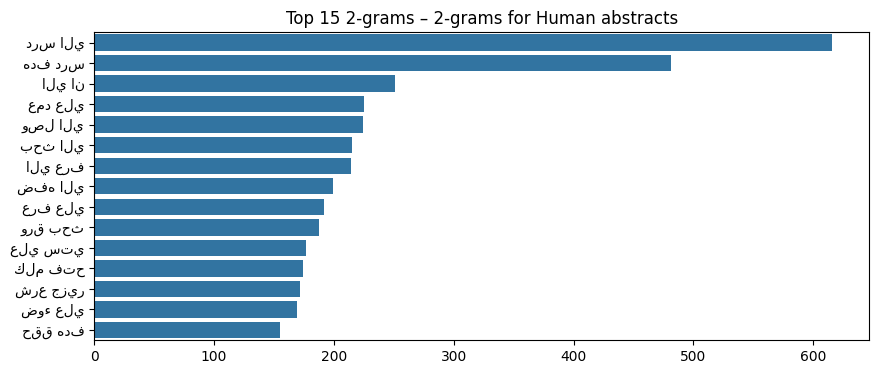


 Top Bigrams for AI-generated abstracts:


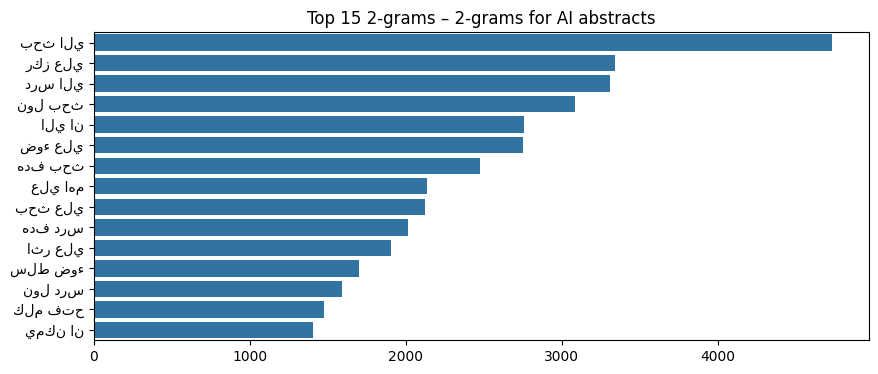

In [ ]:
# --- N-gram Frequency ---
def plot_top_ngrams(texts, n=2, top_k=15):
    from sklearn.feature_extraction.text import CountVectorizer
    vec = CountVectorizer(ngram_range=(n, n))
    bag = vec.fit_transform(texts)
    sum_words = bag.sum(axis=0)
    freqs = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    freqs = sorted(freqs, key=lambda x: x[1], reverse=True)[:top_k]
    words, counts = zip(*freqs)
    plt.figure(figsize=(10,4))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f"Top {top_k} {n}-grams – {n}-grams for {'Human' if texts==human_texts else 'AI'} abstracts")
    plt.show()

print("\n Top Bigrams for Human-written abstracts:")
plot_top_ngrams(human_texts, n=2)

print("\n Top Bigrams for AI-generated abstracts:")
plot_top_ngrams(ai_texts, n=2)


In [ ]:
#Sentence Length Distribution

#Purpose: Compare how long the abstracts are (in words or characters).
#AI-generated text might be longer, more repetitive, or more uniform than human-written text.

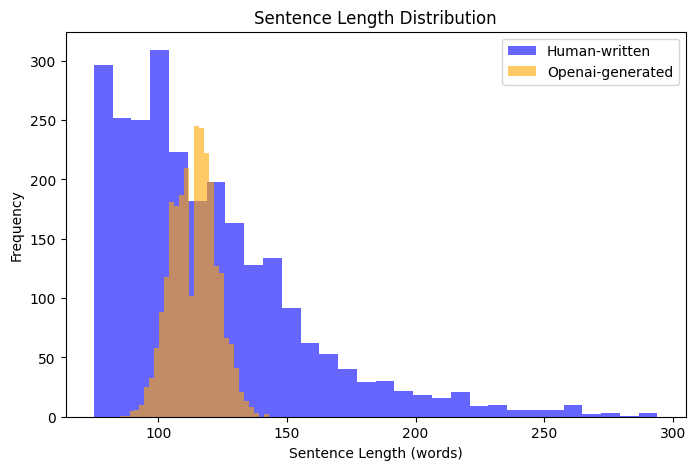

In [ ]:

import matplotlib.pyplot as plt

df["human_length"] = df["original_abstract"].apply(lambda x: len(x.split()))
df["openai_length"] = df["openai_generated_abstract"].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
plt.hist(df["human_length"], bins=30, alpha=0.6, label="Human-written", color='blue')
plt.hist(df["openai_length"], bins=30, alpha=0.6, label="Openai-generated", color='orange')
plt.xlabel("Sentence Length (words)")
plt.ylabel("Frequency")
plt.title("Sentence Length Distribution")
plt.legend()
plt.show()

In [ ]:
#Vocabulary Richness (Type–Token Ratio)

#Purpose: See how diverse the vocabulary is — humans often use richer language.

/tmp/ipython-input-1418030320.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df["human_ttr"], df["openai_ttr"]], labels=["Human", "Open AI"])


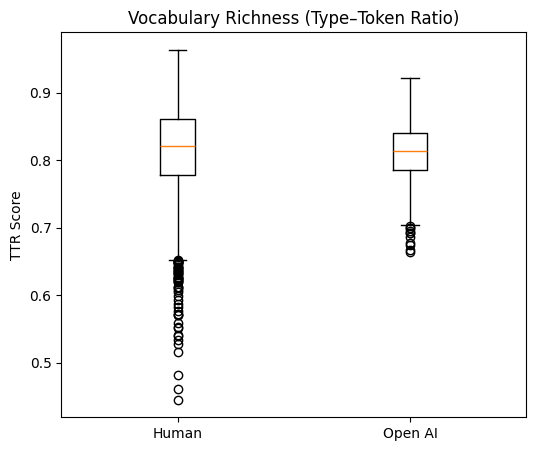

In [ ]:
def type_token_ratio(text):
    words = text.split()
    return len(set(words)) / len(words) if words else 0

df["human_ttr"] = df["original_abstract"].apply(type_token_ratio)
df["openai_ttr"] = df["openai_generated_abstract"].apply(type_token_ratio)

plt.figure(figsize=(6,5))
plt.boxplot([df["human_ttr"], df["openai_ttr"]], labels=["Human", "Open AI"])
plt.title("Vocabulary Richness (Type–Token Ratio)")
plt.ylabel("TTR Score")
plt.show()

In [ ]:
#Word Frequency Comparison (Side-by-Side Bar Plot)

#Purpose: See which words are overused by Open AI vs humans.

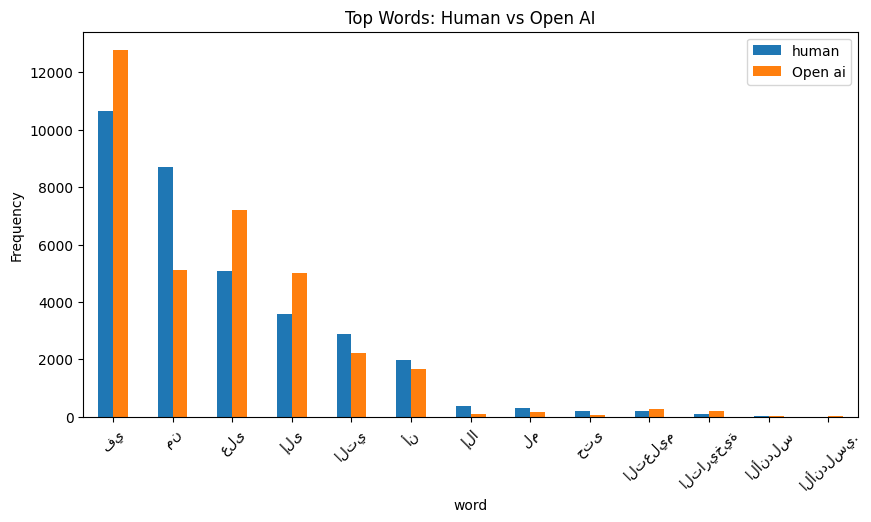

In [ ]:
from collections import Counter
import pandas as pd

human_words = " ".join(df["original_abstract"]).split()
Openai_words = " ".join(df["openai_generated_abstract"]).split()

human_freq = Counter(human_words)
ai_freq = Counter(Openai_words)

common_words = set(list(human_freq.keys())[:100]) & set(list(ai_freq.keys())[:100])

data = []
for w in common_words:
    data.append((w, human_freq[w], ai_freq[w]))

freq_df = pd.DataFrame(data, columns=["word", "human", "Open ai"]).sort_values("human", ascending=False)[:15]

freq_df.plot(x="word", kind="bar", figsize=(10,5), title="Top Words: Human vs Open AI", rot=45)
plt.ylabel("Frequency")
plt.show()